In [22]:
#question1
from Bio import Entrez, SeqIO
Entrez.email = "shreya.25210126.iitgn.ac.in"   
OUTPUT_FILE = "globin_sequences.fasta"

# searching for globin sequences
handle = Entrez.esearch(db="protein", term="globin", retmax=200)
ids = Entrez.read(handle)["IdList"]

# fetching the sequences
fetch = Entrez.efetch(db="protein", id=",".join(ids), rettype="fasta")
globinsequences = list(SeqIO.parse(fetch, "fasta"))

# saving the results
SeqIO.write(globinsequences, OUTPUT_FILE, "fasta")

200

In [28]:
#question2

#list to store only the longer sequences
over100 = []  

#go through each downloaded sequence and keep only those with length over 100 aa
for seq in globinsequences:     
    if len(seq.seq) >= 100:     
        over100.append(seq)    

#save the output
SeqIO.write(over100, "globins_over100 .fasta", "fasta")  

189

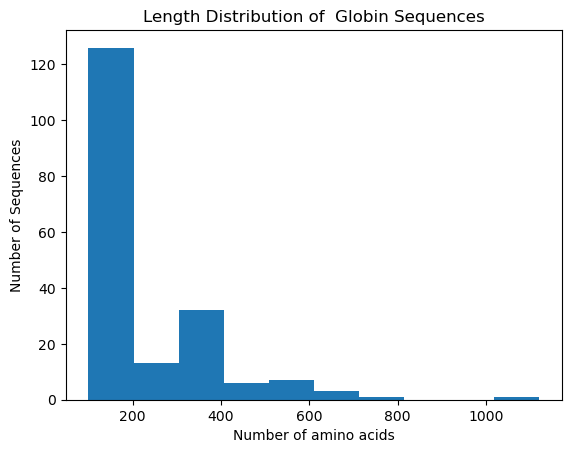

In [32]:
#question3

# make a list of lengths of all sequences that are over 100 aa
sequencelengths = []

#go through each filtered sequence and store its length
for seq in over100:        
  sequencelengths.append(len(seq.seq))   

# plot the histogram
import matplotlib.pyplot as plt
plt.hist(sequencelengths) 
plt.title("Length Distribution of  Globin Sequences") 
plt.xlabel("Number of amino acids")    
plt.ylabel("Number of Sequences")          
plt.show()                                   

In [37]:
#question4

#take each filtered sequence and extract the organism name from inside the brackets
selected = []   
for seq in globinsequences:
    start = seq.description.rfind("[") + 1
    end = seq.description.rfind("]")
    org = seq.description[start:end]

# check if this organism is already selected; if not, add it to the list
    already = False
    for s in selected:
    
     if org in s.description:
            already = True
            break   
    
    if not already:
        selected.append(seq)
        
#stop after 10 seq
    if len(selected) == 10:
        break

# creating filename 
i = 1
for s in selected:
    filename = "seq_" + str(i) + ".fasta"    
    SeqIO.write(s, filename, "fasta")
    i += 1


In [11]:
#question6
from Bio.Align.Applications import ClustalOmegaCommandline

input_file = "combined_sequences.fasta"
output_file = "msa_clustalo.phy"   

clustalomega = ClustalOmegaCommandline(
    infile=input_file,
    outfile=output_file,
    outfmt="phylip")

stdout, stderr = clustalomega()


ApplicationError: Non-zero return code 1 from 'clustalo -i combined_sequences.fasta -o msa_clustalo.phy --outfmt phylip', message "FATAL: Cowardly refusing to overwrite already existing file 'msa_clustalo.phy'. Use --force to force overwriting."